# Polarization States of Electromagnetic Waves

## Introduction

Polarization describes the orientation of the electric field vector in an electromagnetic wave as it propagates through space. Understanding polarization is fundamental to optics, antenna design, and quantum mechanics.

## Theoretical Foundation

### The Electric Field of a Plane Wave

Consider a monochromatic plane wave propagating along the $z$-axis. The electric field can be decomposed into two orthogonal components:

$$\vec{E}(z,t) = E_x(z,t)\hat{x} + E_y(z,t)\hat{y}$$

where:

$$E_x(z,t) = E_{0x}\cos(kz - \omega t + \phi_x)$$
$$E_y(z,t) = E_{0y}\cos(kz - \omega t + \phi_y)$$

Here, $E_{0x}$ and $E_{0y}$ are the amplitudes, $k = 2\pi/\lambda$ is the wave number, $\omega = 2\pi f$ is the angular frequency, and $\phi_x$, $\phi_y$ are the phase angles.

### Phase Difference

The relative phase difference $\delta = \phi_y - \phi_x$ determines the polarization state:

- **Linear Polarization**: $\delta = 0$ or $\delta = \pi$
- **Circular Polarization**: $\delta = \pm\pi/2$ with $E_{0x} = E_{0y}$
- **Elliptical Polarization**: All other cases

### Jones Vector Representation

The polarization state can be compactly represented using the Jones vector:

$$\vec{J} = \begin{pmatrix} E_{0x}e^{i\phi_x} \\ E_{0y}e^{i\phi_y} \end{pmatrix}$$

### Stokes Parameters

For a complete description including partially polarized light, the Stokes parameters are:

$$S_0 = E_{0x}^2 + E_{0y}^2$$
$$S_1 = E_{0x}^2 - E_{0y}^2$$
$$S_2 = 2E_{0x}E_{0y}\cos\delta$$
$$S_3 = 2E_{0x}E_{0y}\sin\delta$$

The degree of polarization is given by:

$$P = \frac{\sqrt{S_1^2 + S_2^2 + S_3^2}}{S_0}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True

## Polarization State Visualization

We will visualize different polarization states by plotting the trajectory of the electric field vector in the $x$-$y$ plane (polarization ellipse) and as a function of propagation distance.

In [2]:
def electric_field(t, z, E0x, E0y, phi_x, phi_y, k=2*np.pi, omega=2*np.pi):
    """
    Calculate electric field components for a plane wave.
    
    Parameters:
    -----------
    t : array-like
        Time values
    z : float
        Propagation distance
    E0x, E0y : float
        Amplitude of x and y components
    phi_x, phi_y : float
        Phase of x and y components
    k : float
        Wave number (default: 2π)
    omega : float
        Angular frequency (default: 2π)
    
    Returns:
    --------
    Ex, Ey : arrays
        Electric field components
    """
    Ex = E0x * np.cos(k*z - omega*t + phi_x)
    Ey = E0y * np.cos(k*z - omega*t + phi_y)
    return Ex, Ey

def compute_stokes(E0x, E0y, delta):
    """
    Compute Stokes parameters for given polarization.
    
    Parameters:
    -----------
    E0x, E0y : float
        Amplitude components
    delta : float
        Phase difference (phi_y - phi_x)
    
    Returns:
    --------
    S0, S1, S2, S3 : float
        Stokes parameters
    """
    S0 = E0x**2 + E0y**2
    S1 = E0x**2 - E0y**2
    S2 = 2 * E0x * E0y * np.cos(delta)
    S3 = 2 * E0x * E0y * np.sin(delta)
    return S0, S1, S2, S3

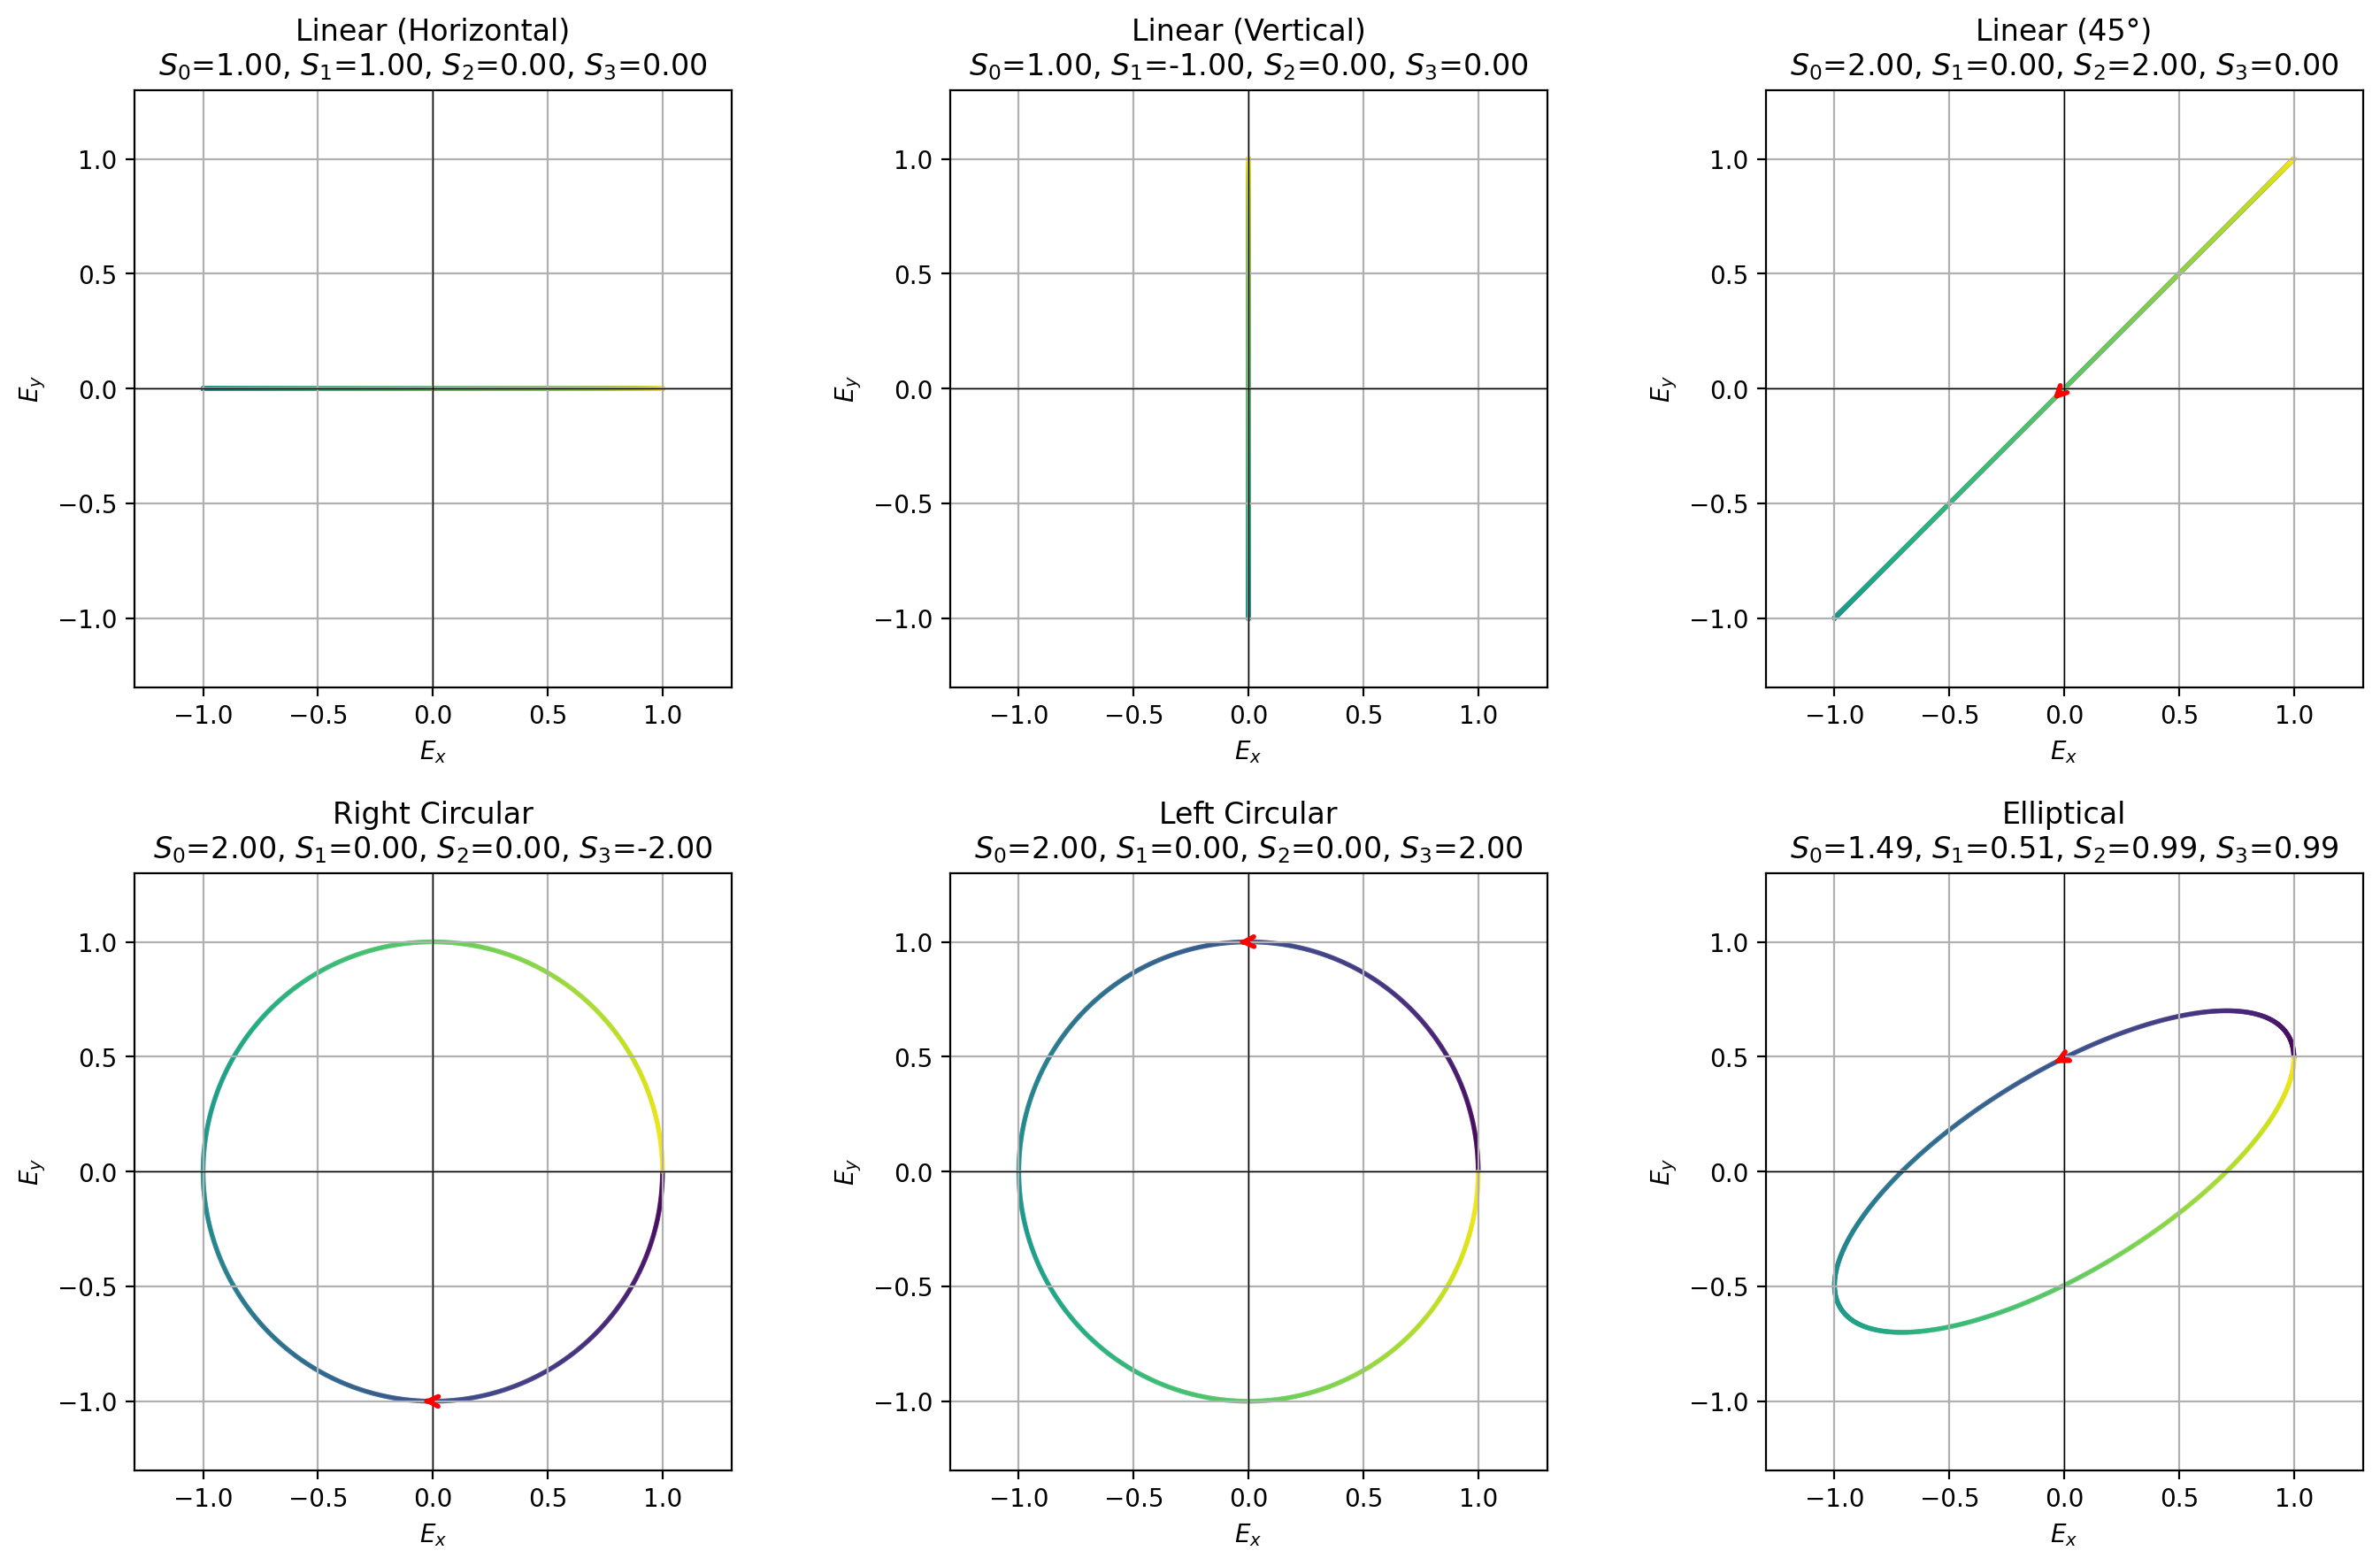

Polarization states visualization saved to 'plot.png'


In [3]:
# Define polarization states to visualize
polarization_states = {
    'Linear (Horizontal)': {'E0x': 1.0, 'E0y': 0.0, 'delta': 0},
    'Linear (Vertical)': {'E0x': 0.0, 'E0y': 1.0, 'delta': 0},
    'Linear (45°)': {'E0x': 1.0, 'E0y': 1.0, 'delta': 0},
    'Right Circular': {'E0x': 1.0, 'E0y': 1.0, 'delta': -np.pi/2},
    'Left Circular': {'E0x': 1.0, 'E0y': 1.0, 'delta': np.pi/2},
    'Elliptical': {'E0x': 1.0, 'E0y': 0.7, 'delta': np.pi/4}
}

# Time array for one complete cycle
t = np.linspace(0, 1, 1000)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 9))
axes = axes.flatten()

for idx, (name, params) in enumerate(polarization_states.items()):
    E0x = params['E0x']
    E0y = params['E0y']
    delta = params['delta']
    
    # Calculate electric field at z=0
    Ex, Ey = electric_field(t, 0, E0x, E0y, 0, delta)
    
    # Compute Stokes parameters
    S0, S1, S2, S3 = compute_stokes(E0x, E0y, delta)
    
    # Plot polarization ellipse
    ax = axes[idx]
    
    # Plot the trajectory with color gradient to show time evolution
    points = np.array([Ex, Ey]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Use scatter for color-coded time evolution
    colors = plt.cm.viridis(t)
    ax.scatter(Ex, Ey, c=t, cmap='viridis', s=1, alpha=0.7)
    
    # Add arrows to show direction of rotation
    if E0x > 0 and E0y > 0:
        arrow_idx = len(t) // 4
        ax.annotate('', xy=(Ex[arrow_idx+10], Ey[arrow_idx+10]), 
                   xytext=(Ex[arrow_idx], Ey[arrow_idx]),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2))
    
    # Set axis properties
    max_val = max(E0x, E0y, 0.1) * 1.3
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel(r'$E_x$')
    ax.set_ylabel(r'$E_y$')
    ax.set_title(f'{name}\n$S_0$={S0:.2f}, $S_1$={S1:.2f}, $S_2$={S2:.2f}, $S_3$={S3:.2f}')

plt.tight_layout()
plt.savefig('polarization_states_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Polarization states visualization saved to 'plot.png'")

## 3D Visualization of Wave Propagation

Let's visualize how different polarization states appear as the wave propagates through space.

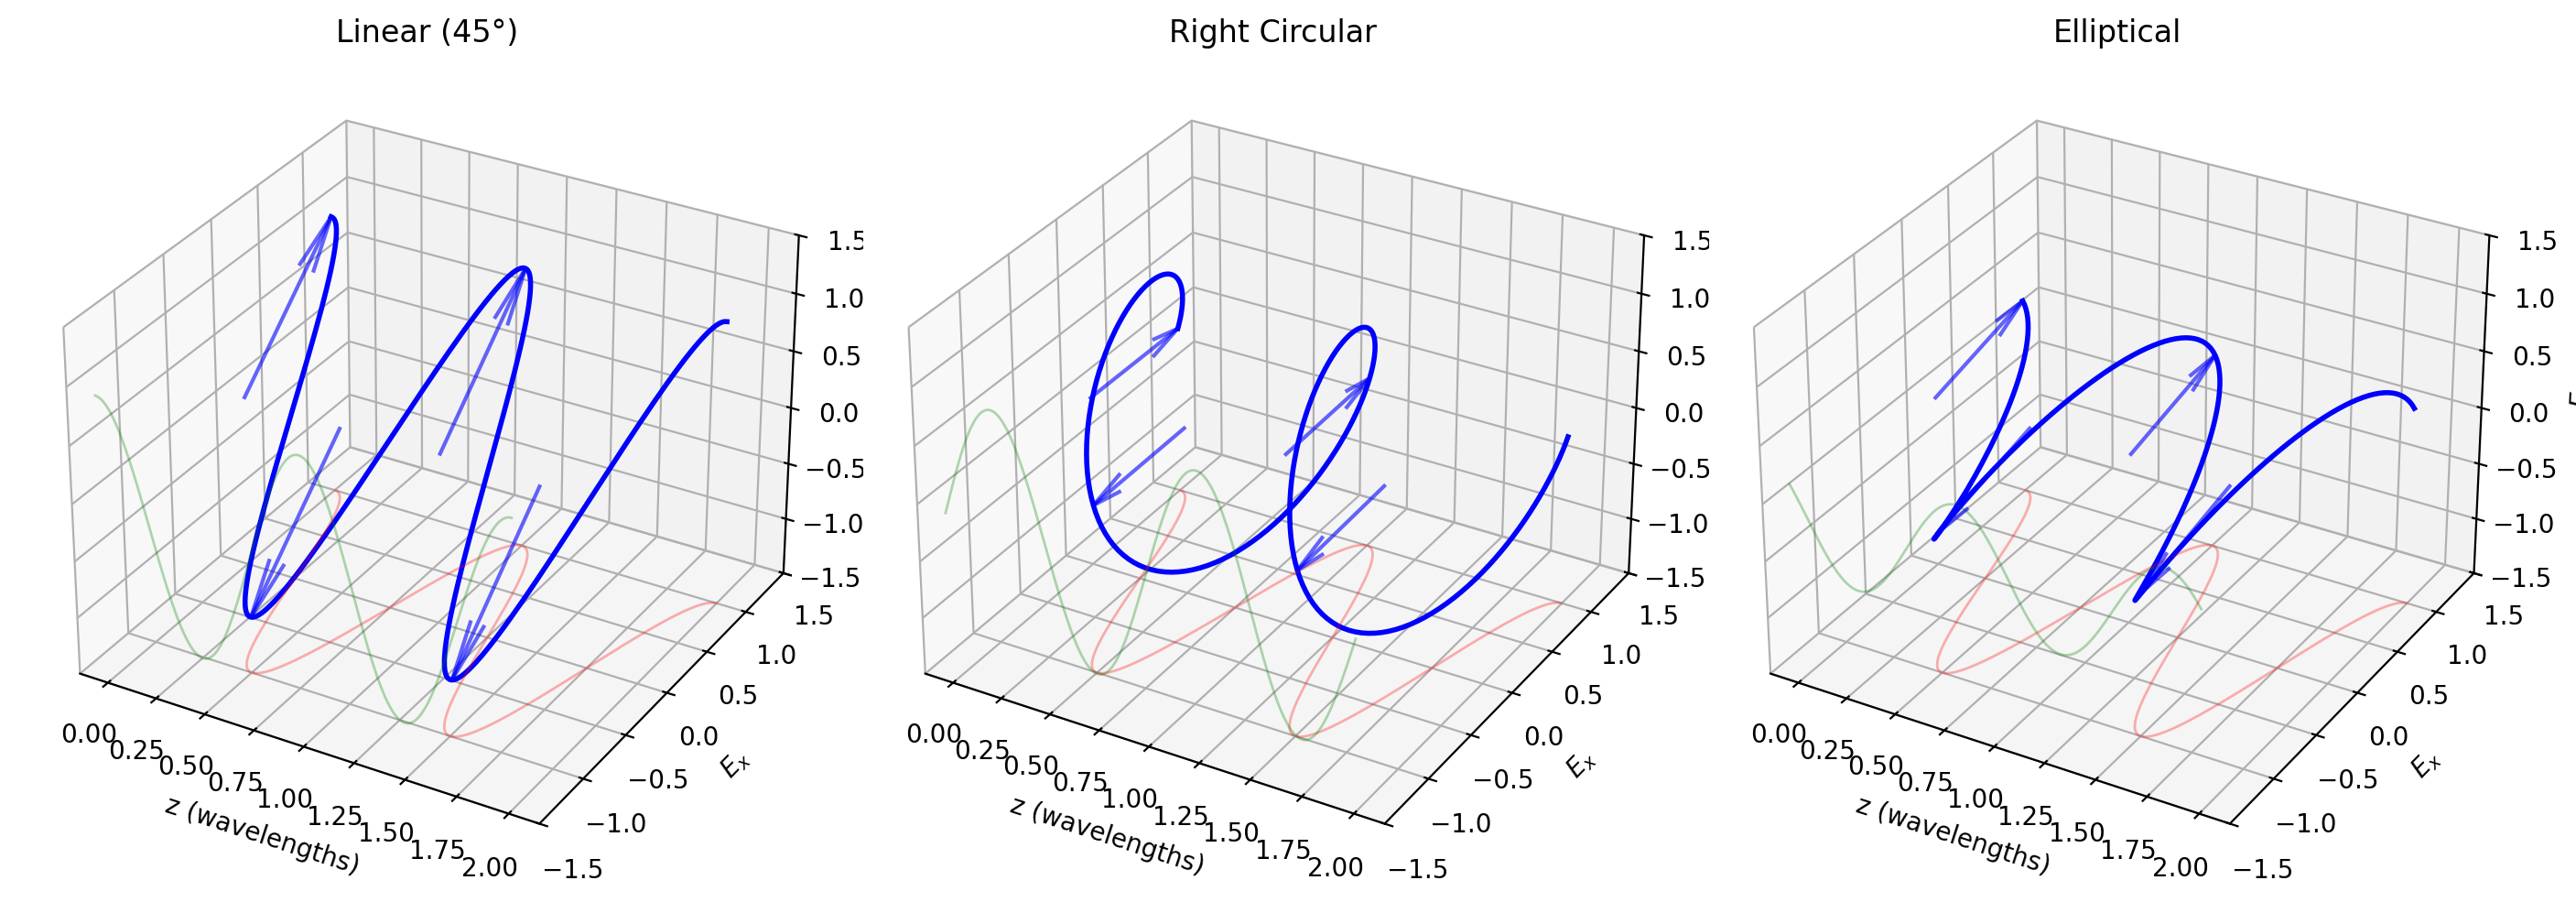

In [4]:
# 3D visualization of selected polarization states
fig = plt.figure(figsize=(14, 5))

states_3d = [
    ('Linear (45°)', 1.0, 1.0, 0),
    ('Right Circular', 1.0, 1.0, -np.pi/2),
    ('Elliptical', 1.0, 0.5, np.pi/3)
]

z = np.linspace(0, 2, 200)  # Two wavelengths
t_fixed = 0  # Fixed time

for idx, (name, E0x, E0y, delta) in enumerate(states_3d):
    ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
    
    # Calculate field at each z position
    Ex = E0x * np.cos(2*np.pi*z - 2*np.pi*t_fixed)
    Ey = E0y * np.cos(2*np.pi*z - 2*np.pi*t_fixed + delta)
    
    # Plot the helix
    ax.plot(z, Ex, Ey, 'b-', linewidth=2, label='E-field')
    
    # Plot projections
    ax.plot(z, Ex, np.full_like(z, -1.5), 'r-', alpha=0.3, linewidth=1)
    ax.plot(z, np.full_like(z, -1.5), Ey, 'g-', alpha=0.3, linewidth=1)
    
    # Add arrows at selected points
    arrow_positions = [0, 50, 100, 150]
    for pos in arrow_positions:
        ax.quiver(z[pos], 0, 0, 0, Ex[pos], Ey[pos], 
                 color='blue', alpha=0.6, arrow_length_ratio=0.3)
    
    ax.set_xlabel('z (wavelengths)')
    ax.set_ylabel(r'$E_x$')
    ax.set_zlabel(r'$E_y$')
    ax.set_title(name)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)

plt.tight_layout()
plt.show()

## Poincaré Sphere Representation

The Poincaré sphere provides a geometric representation of polarization states using the normalized Stokes parameters:

$$s_1 = \frac{S_1}{S_0}, \quad s_2 = \frac{S_2}{S_0}, \quad s_3 = \frac{S_3}{S_0}$$

These define a point on a unit sphere where:
- The equator represents linear polarization states
- The north pole represents right circular polarization
- The south pole represents left circular polarization
- All other points represent elliptical polarization

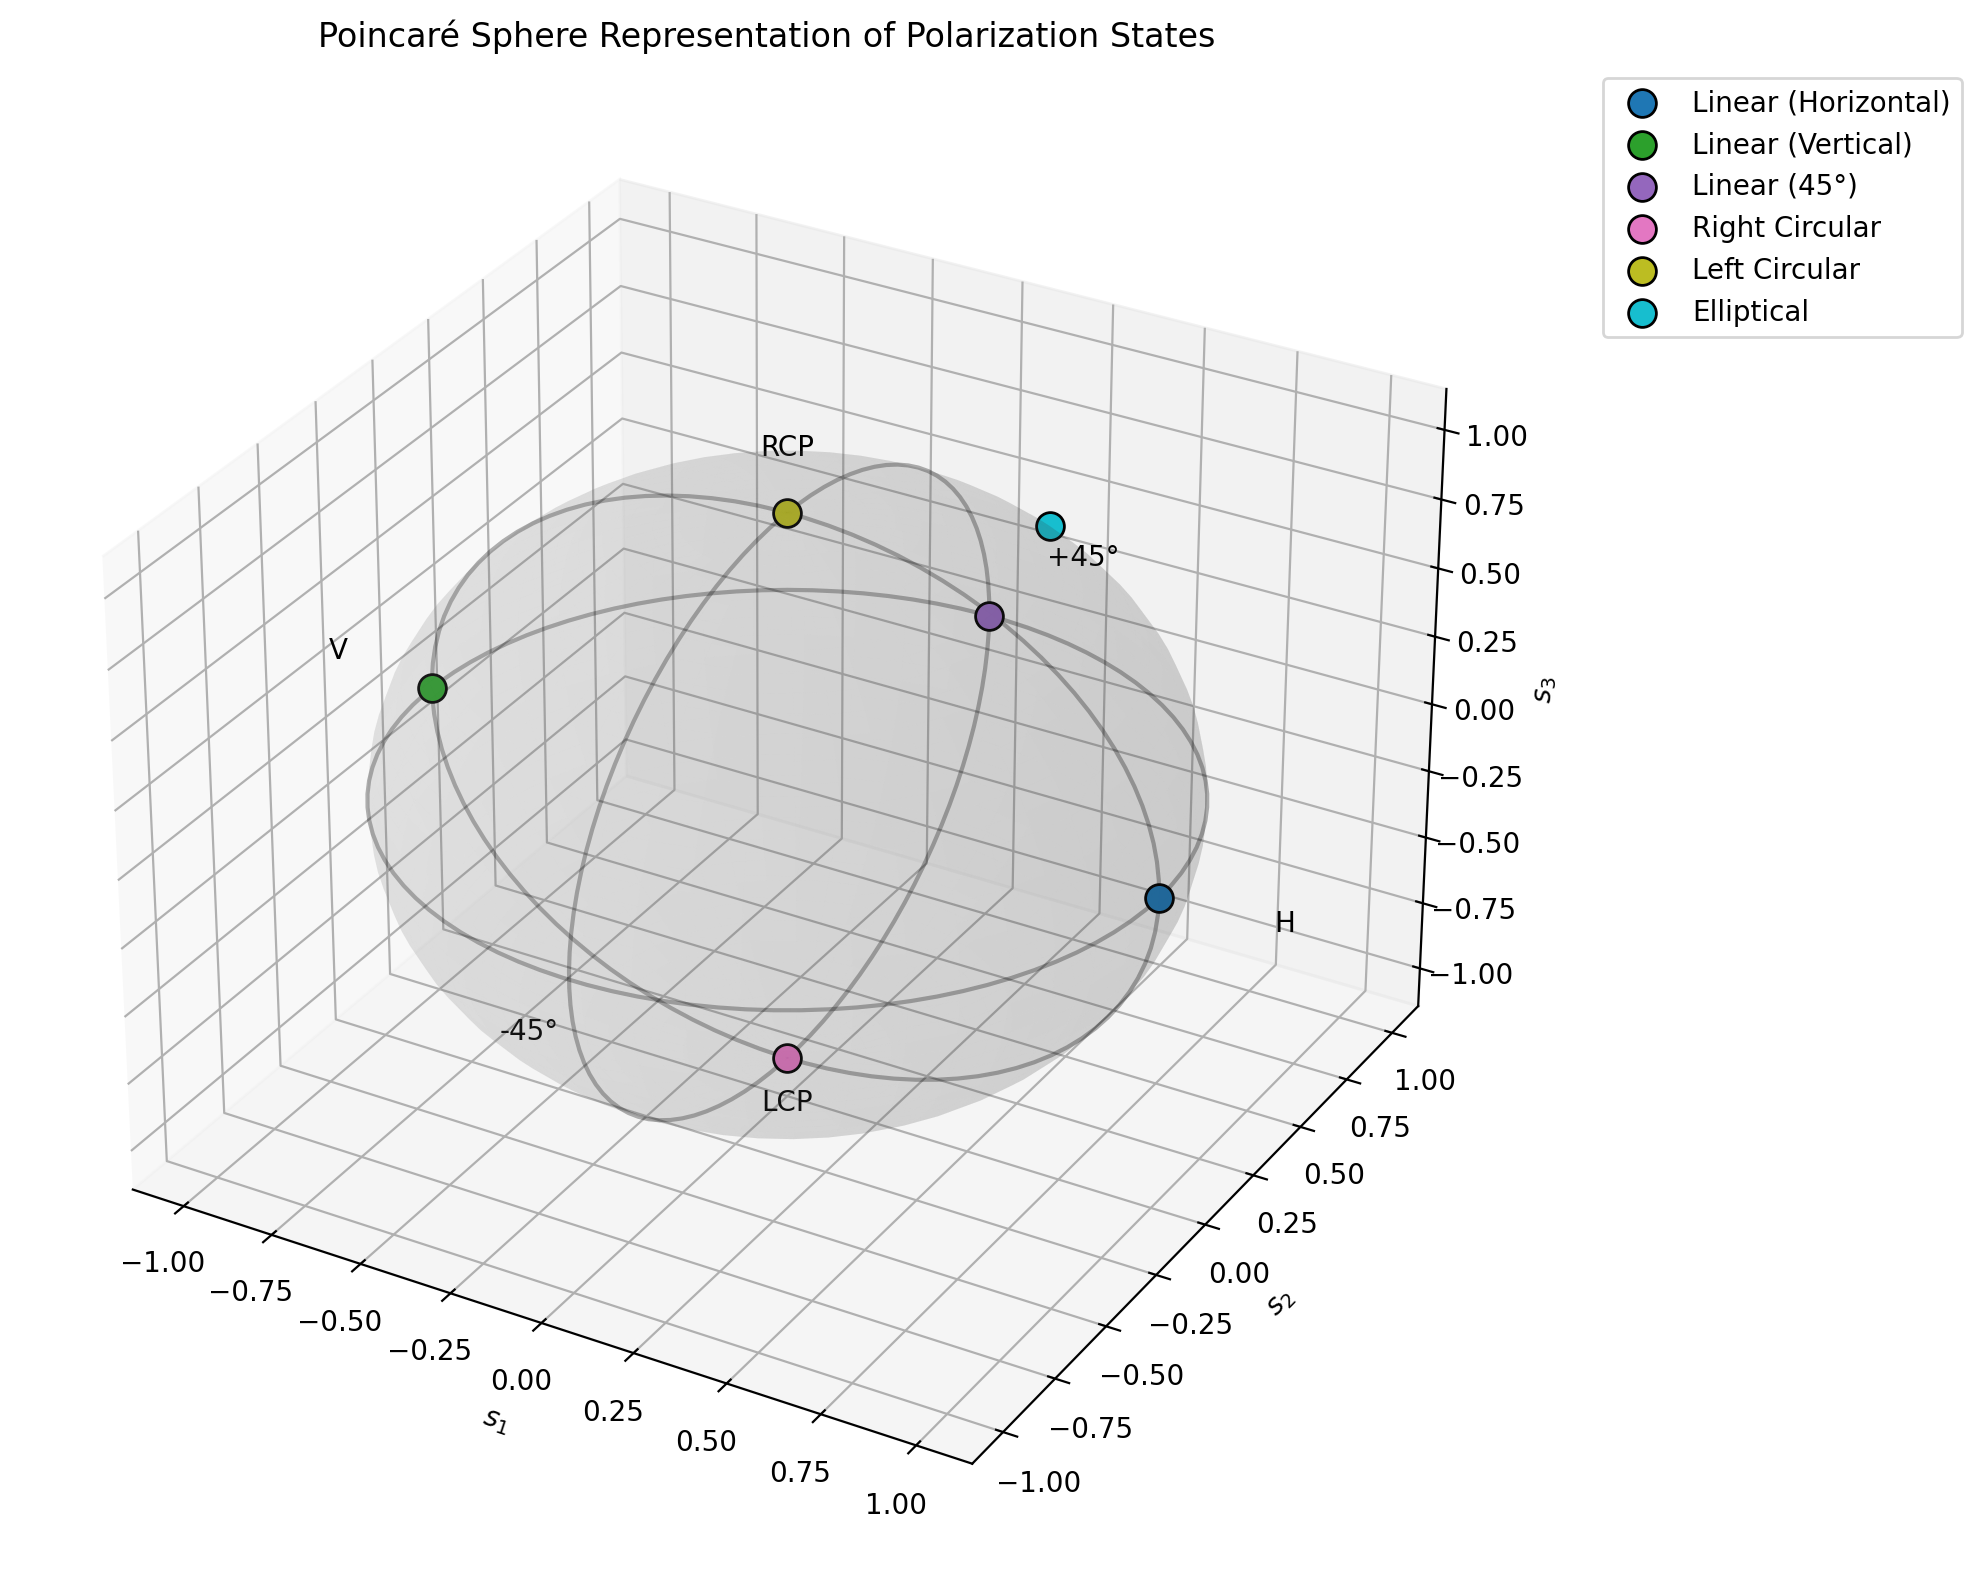

In [5]:
# Poincaré Sphere visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw the sphere
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='gray')

# Draw equator and meridians
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), np.zeros_like(theta), 'k-', alpha=0.3)
ax.plot(np.cos(theta), np.zeros_like(theta), np.sin(theta), 'k-', alpha=0.3)
ax.plot(np.zeros_like(theta), np.cos(theta), np.sin(theta), 'k-', alpha=0.3)

# Plot polarization states on the sphere
colors = plt.cm.tab10(np.linspace(0, 1, len(polarization_states)))

for idx, (name, params) in enumerate(polarization_states.items()):
    E0x = params['E0x']
    E0y = params['E0y']
    delta = params['delta']
    
    S0, S1, S2, S3 = compute_stokes(E0x, E0y, delta)
    
    # Normalize (handle zero case)
    if S0 > 0:
        s1, s2, s3 = S1/S0, S2/S0, S3/S0
    else:
        s1, s2, s3 = 0, 0, 0
    
    ax.scatter([s1], [s2], [s3], s=100, c=[colors[idx]], label=name, edgecolors='black')

# Add labels for poles and axes
ax.text(0, 0, 1.2, 'RCP', fontsize=10, ha='center')
ax.text(0, 0, -1.2, 'LCP', fontsize=10, ha='center')
ax.text(1.3, 0, 0, 'H', fontsize=10)
ax.text(-1.3, 0, 0, 'V', fontsize=10)
ax.text(0, 1.3, 0, '+45°', fontsize=10)
ax.text(0, -1.3, 0, '-45°', fontsize=10)

ax.set_xlabel(r'$s_1$')
ax.set_ylabel(r'$s_2$')
ax.set_zlabel(r'$s_3$')
ax.set_title('Poincaré Sphere Representation of Polarization States')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

## Jones Matrices and Optical Elements

Optical elements that modify polarization can be represented by Jones matrices. The output polarization is:

$$\vec{J}_{out} = \mathbf{M} \cdot \vec{J}_{in}$$

Common Jones matrices:

**Linear Polarizer (horizontal):**
$$\mathbf{P}_H = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}$$

**Quarter-wave plate (fast axis horizontal):**
$$\mathbf{Q} = e^{i\pi/4}\begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$$

**Half-wave plate (fast axis horizontal):**
$$\mathbf{H} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

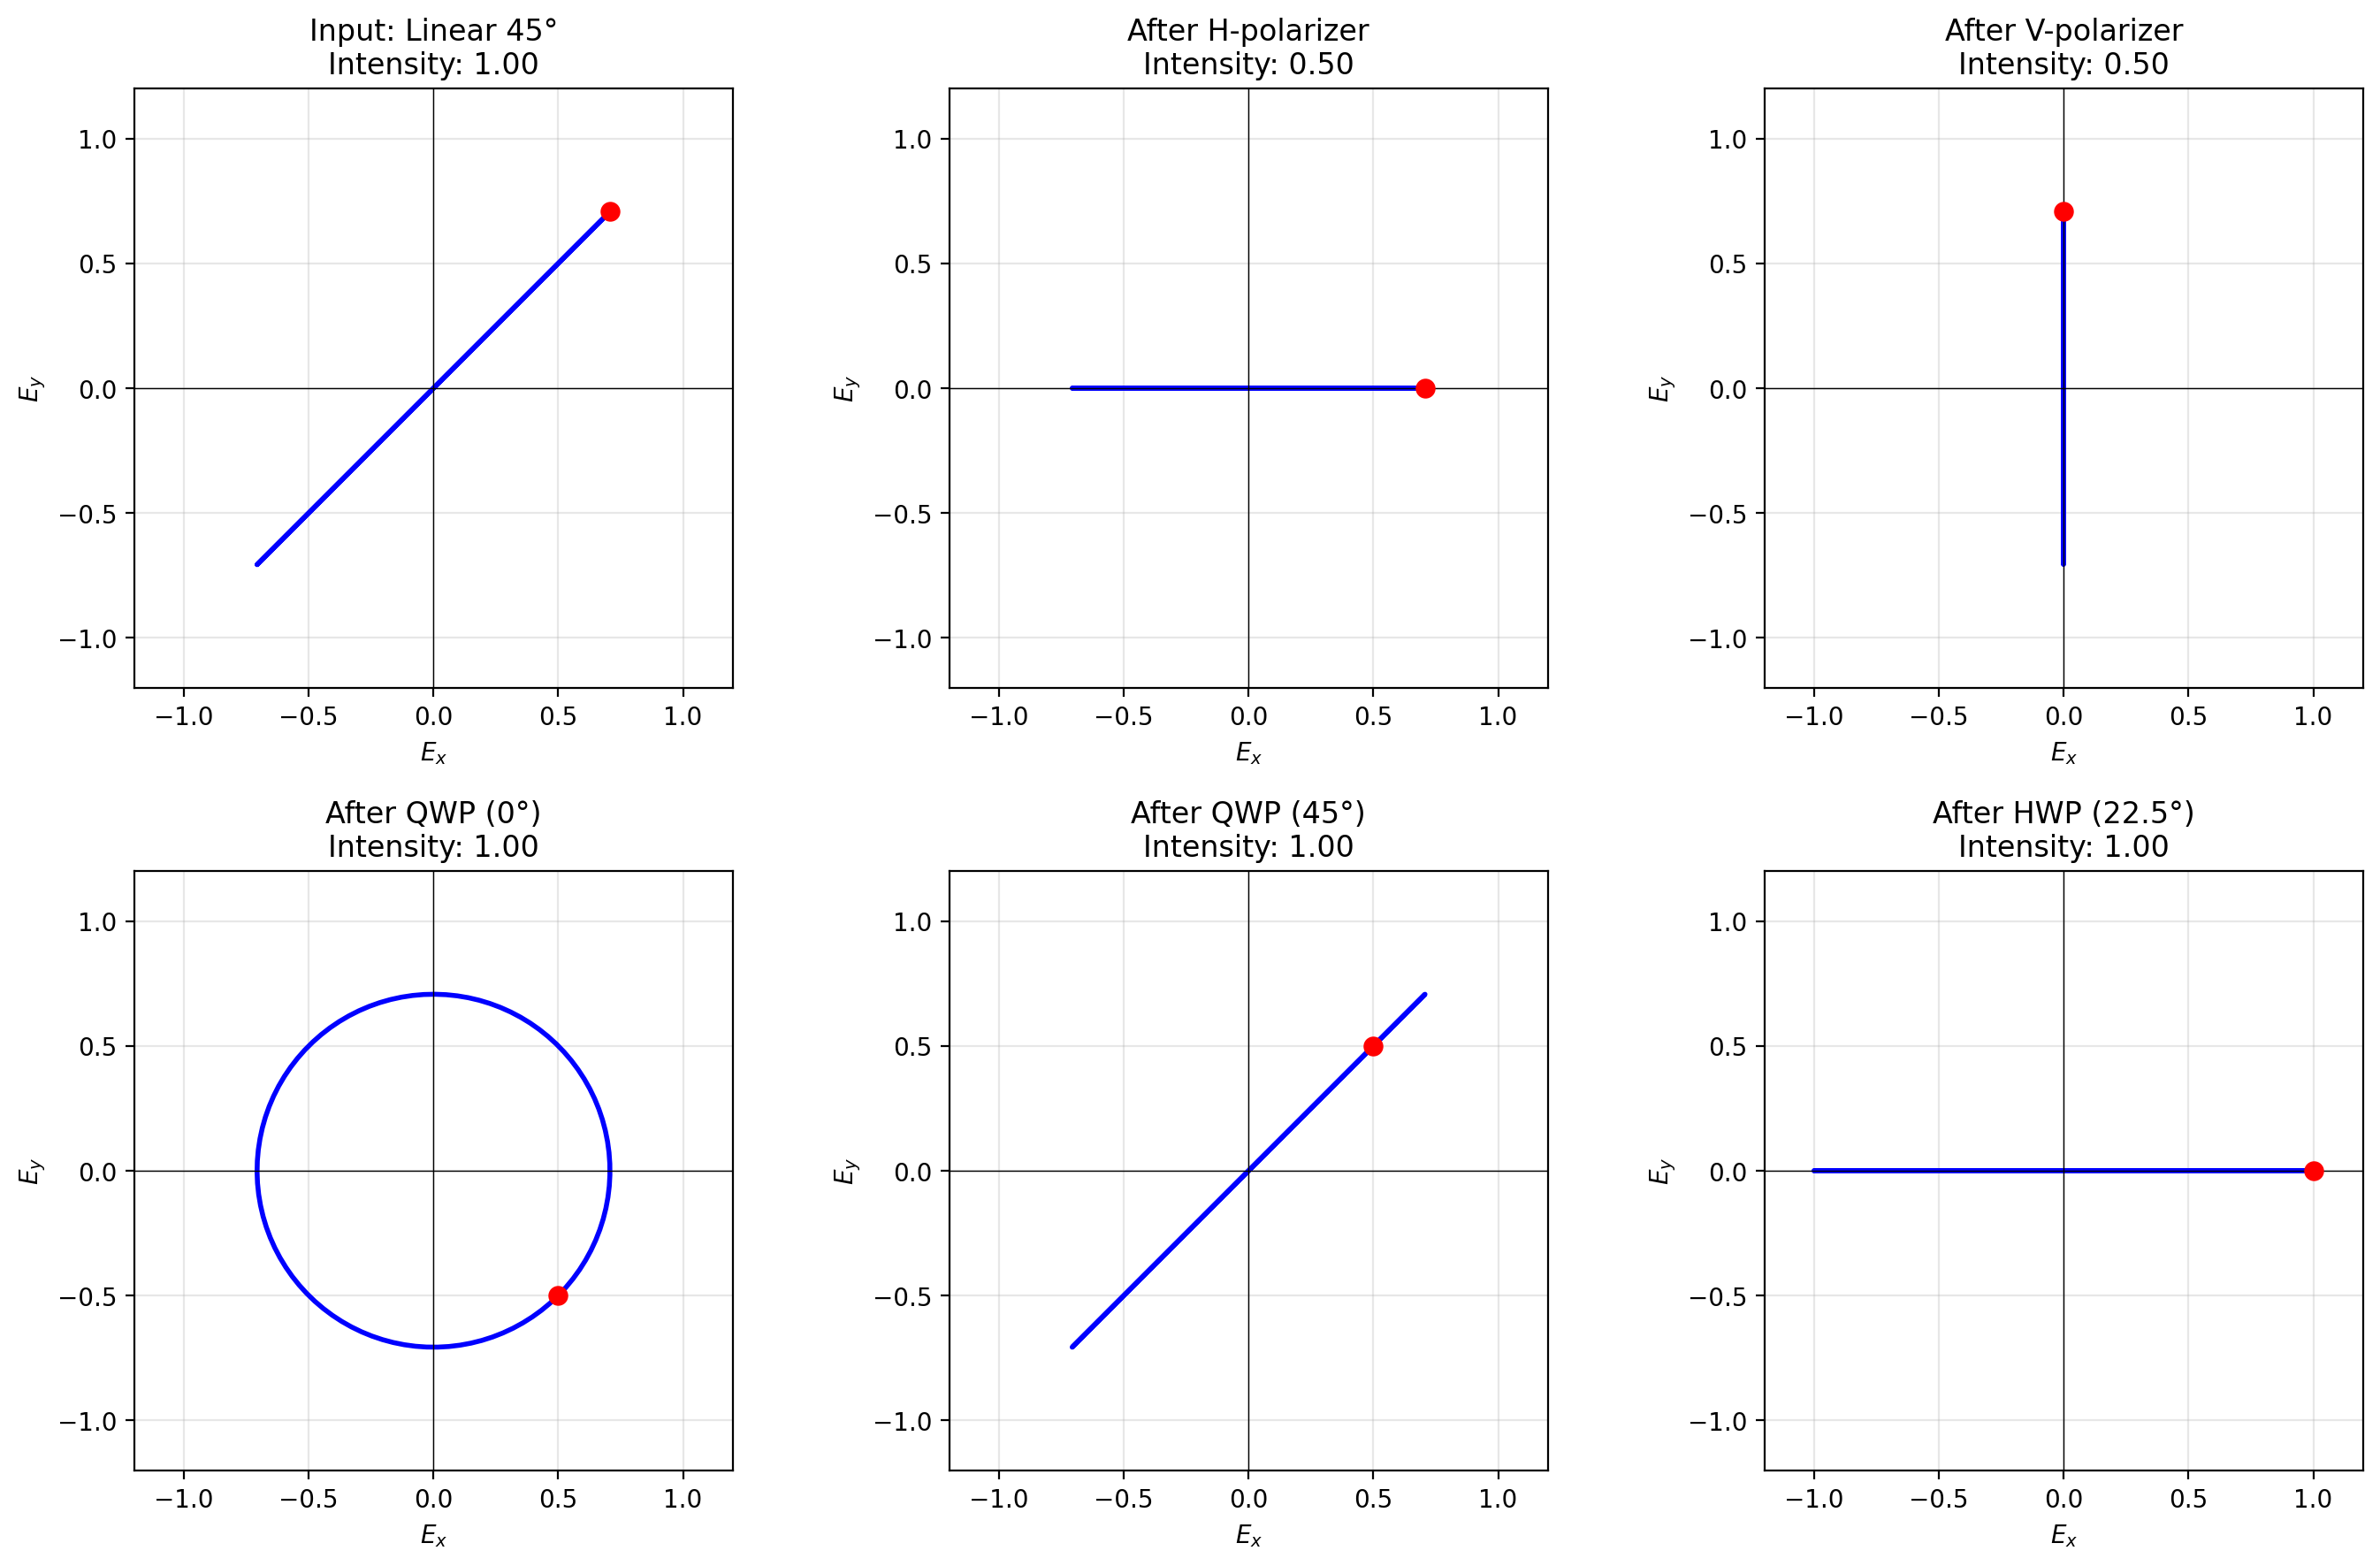

In [6]:
# Jones matrix operations
def jones_vector(E0x, E0y, phi_x, phi_y):
    """Create a Jones vector."""
    return np.array([E0x * np.exp(1j * phi_x), 
                     E0y * np.exp(1j * phi_y)])

def jones_to_polarization_ellipse(J, n_points=100):
    """Convert Jones vector to polarization ellipse coordinates."""
    t = np.linspace(0, 2*np.pi, n_points)
    Ex = np.real(J[0] * np.exp(-1j * t))
    Ey = np.real(J[1] * np.exp(-1j * t))
    return Ex, Ey

# Define Jones matrices for optical elements
def linear_polarizer(angle):
    """Jones matrix for linear polarizer at given angle."""
    c, s = np.cos(angle), np.sin(angle)
    return np.array([[c**2, c*s], [c*s, s**2]])

def quarter_wave_plate(angle):
    """Jones matrix for quarter-wave plate with fast axis at given angle."""
    c, s = np.cos(angle), np.sin(angle)
    return np.exp(1j*np.pi/4) * np.array([
        [c**2 + 1j*s**2, (1-1j)*c*s],
        [(1-1j)*c*s, s**2 + 1j*c**2]
    ])

def half_wave_plate(angle):
    """Jones matrix for half-wave plate with fast axis at given angle."""
    c, s = np.cos(2*angle), np.sin(2*angle)
    return np.array([[c, s], [s, -c]])

# Demonstrate optical element effects
fig, axes = plt.subplots(2, 3, figsize=(14, 9))

# Input: Linear polarization at 45°
J_in = jones_vector(1, 1, 0, 0) / np.sqrt(2)

operations = [
    ('Input: Linear 45°', np.eye(2)),
    ('After H-polarizer', linear_polarizer(0)),
    ('After V-polarizer', linear_polarizer(np.pi/2)),
    ('After QWP (0°)', quarter_wave_plate(0)),
    ('After QWP (45°)', quarter_wave_plate(np.pi/4)),
    ('After HWP (22.5°)', half_wave_plate(np.pi/8))
]

for idx, (title, M) in enumerate(operations):
    ax = axes.flatten()[idx]
    
    J_out = M @ J_in
    Ex, Ey = jones_to_polarization_ellipse(J_out)
    
    # Normalize for display
    intensity = np.abs(J_out[0])**2 + np.abs(J_out[1])**2
    
    ax.plot(Ex, Ey, 'b-', linewidth=2)
    ax.scatter(Ex[0], Ey[0], c='red', s=50, zorder=5, label='Start')
    
    max_val = 1.2
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel(r'$E_x$')
    ax.set_ylabel(r'$E_y$')
    ax.set_title(f'{title}\nIntensity: {intensity:.2f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion

This notebook has explored the fundamental concepts of polarization states in electromagnetic waves:

1. **Mathematical description** using the electric field decomposition and phase relationships
2. **Classification** of linear, circular, and elliptical polarization states
3. **Jones vector** formalism for coherent light manipulation
4. **Stokes parameters** for complete polarization state description
5. **Poincaré sphere** for geometric visualization
6. **Jones matrices** for optical element modeling

Understanding polarization is essential for applications in:
- Optical communications
- Liquid crystal displays
- Polarimetry and remote sensing
- Quantum optics and quantum computing
- 3D cinema technology